# [AI 이노베이션 스퀘어] 12기 고급 시각반
- github: https://github.com/hysKim1/AI_Vision
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/?hl=ko
      
---
* [ TenforFlow Hub](#TenforFlow-Hub )
    * [KerasLayer ](#KerasLayer)
    * [TF Hub 이용한 Transfer Learning](#TF-Hub-이용한-Transfer-Learning)
* [RNN ](#RNN)

---

## Lightweight Deep Learning
- 과거에 불가능했던 것들이 가능해지면서 상업적 feasibility를 위해서 기업이 주도, 상업적으로 이용하기 위해서 기술 경량화
- 고성능 CPU, GPU가 탑재되어 대용량의 메모리 사용 가능한 computing power가 좋은 고성능 환경에서 실제 적용할 수 있게 resource 작게해도 가능하도록 초점
    - 예. CNN 컨볼루션 연산을 줄이는 기법: pointwise(1 channel), depthwise(channel 축소),  depthwise separable( pointwise + depthwise)
    - edge computing:  mobile devices 에서 직접 연하여 cloud에 뿌림
    
    
1. 경량 알고리즘 연구: 정확도 유지한채 연산을 간략하게 하는 경량 기법 연구됨
  - 모델 구조 변경: Residual block (잔여 블록), 1x1 convolution(병목구조)
  - 합성곱 필터 변경
  - 자동모델 탐색: AutoML MNasNet 특정 요소(지연시간, 에너지) 주어진 경우 강화학습을 통해서 최적의 모델을 자동 탐색하는 연구

2. 알고리즘 경량화 연구: 복잡한 알고리즘을 단순화
    - decision tree 의 pruning 기법을 가져와서 weight, channel pruning
 - 지식 증류 : knowledge distillation(specialist model 증류시켜서 간단한 모델에 넘겨서 정확도를 유지), transfer learning (실용적 활용 가능)
 
> 복잡한 구조 기반으로 더 간략한 모델을 만들 수 있어서 모델을 잘 쓸 수 있도록 지원

-  기존 모델을 모델이 많으면 transfer learning, knowledge distillation 등으로 기존 모델 활용해서 내 모델을 비슷한 성능을 내도록 할 수 있음
- 기존의 기법을 가져와서 ensemble

## TenforFlow Hub
- 만든 모델을 가져왔지만 점유율 높이기 위해서 모델을 쉽게 사용하도록 tensorflow hub 제공 
   > 경량 딥러닝 기술 동향
   > - 과거에 불가능했던것들이 가능해서 feasibility test로 기업위주도 되었다가 가능해서 상업적으로 이용하기 위해서 기술 경량화
   > - 실제 적용할 수 있게 resource 작게해도 가능하도록 초점 맞춤
   
-  기존 모델을 모델이 많으면 transfer learning, knowledge distillation 등으로 기존 모델 활용해서 내 모델을 비슷한 성능을 내도록 할 수 있음 
[Model Zoo](https://modelzoo.co)
 - 모델별로 모아놓음

[TenforFlow Hub: Image](https://tfhub.dev/s?module-type=image-augmentation,image-classification,image-classification-logits,image-classifier,image-feature-vector,image-generator,image-object-detection,image-others,image-pose-detection,image-segmentation,image-style-transfer,image-super-resolution,image-rnn-agent)
- Model Zoo 확장판
- fine tunable 여부

In [23]:
import tensorflow as tf

In [25]:
#추가 모듈 엄데이트
!pip install -U tensorflow-hub  

Requirement already up-to-date: tensorflow-hub in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [26]:
import tensorflow_hub as hub #거의 이미지 관련 모델

In [27]:
dir(hub) #KerasLayer, image_...

['ImageModuleInfo',
 'KerasLayer',
 'LatestModuleExporter',
 'LooseVersion',
 'Module',
 'ModuleSpec',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_run',
 'absolute_import',
 'add_signature',
 'attach_image_module_info',
 'attach_message',
 'compressed_module_resolver',
 'config',
 'create_module_spec',
 'create_module_spec_from_saved_model',
 'division',
 'estimator',
 'eval_function_for_module',
 'feature_column',
 'feature_column_v2',
 'get_expected_image_size',
 'get_num_image_channels',
 'image_embedding_column',
 'image_module_info_pb2',
 'image_util',
 'keras_layer',
 'load',
 'load_module_spec',
 'logging',
 'meta_graph_lib',
 'module',
 'module_attachment_pb2',
 'module_def_pb2',
 'module_impl',
 'module_spec',
 'module_v2',
 'native_module',
 'print_function',
 'register_module_for_export',
 'registry',
 'resolve',
 'resolver',
 'saved_model_lib',
 'saved_model_mod

## 분류기 다운로드하기
- TF 2.0 에서 사용 가능한 모델인지 체크

### KerasLayer
- tf hub에서 가져온 모델을 레이어처럼 사용함
- cache되지 않기 때문에 주의
- `hub.KerasLayer( "tf hub 주소", trainable=False, arguments=None, _sentinel=None, tags=None, signature=None, signature_outputs_as_dict=None, output_key=None, output_shape=None, load_options=None, **kwargs)`

handle

- KerasLayer 모델내에 모델 넣을 수 있음 모델을 layer처럼 사용하기 때문에 muiti-inputs,ouputs도 sequential에 넣을수 있음

In [24]:
#방법1. keras.applications
tf.keras.applications 

#방법2. tensorflow_hub
hub.KerasLayer

<function tensorflow.python.keras.applications.vgg16.VGG16>

In [28]:
layer =hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2" ,) 
#camel ->instantiate
layer

In [29]:
dir(layer) #build, call ,get_weights ,name...

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_existing_weight',
 '_add_trackable',
 '_add_variable_with_custom_getter',
 '_apply_output_shape_if_set',
 '_arguments',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_call_loss_if_trainable',
 '_callable',
 '_callable_losses',
 '_cast_single_input',
 '_check_trainability',
 '_checkpoint_dependencies',
 '_clear_losses',
 '_comput

In [30]:
isinstance(layer, tf.keras.layers.Layer)
#내부적으로 keras 레이어로 변환 

True

In [31]:
layer.weights

[<tf.Variable 'Variable:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
 array([[[[-1.71659231e-01, -3.33731920e-01,  5.30122258e-02,
           -5.93232973e-21,  2.08742931e-01, -1.20433941e-01,
            1.75700430e-02, -3.10708203e-22, -9.62498877e-03,
            1.90229788e-01, -3.67278278e-01,  3.95997976e-22,
           -2.36236629e-22,  3.36706383e-22,  8.83555040e-02,
           -7.75416642e-02,  3.95842289e-05, -3.63377742e-02,
            5.99925742e-02,  5.53736472e-21, -4.68022423e-04,
           -1.23387486e-01, -1.34351701e-01,  8.75968020e-03,
           -2.47503355e-01,  1.58492010e-02, -2.43145856e-04,
           -1.09811597e-01,  5.55126644e-22, -2.03368161e-03,
            2.83311605e-01,  7.66634047e-02],
          [-3.18941772e-01, -6.09864295e-01, -1.70770675e-01,
           -6.76705635e-21, -5.82342505e-01, -2.56068230e-01,
           -4.18974347e-02,  1.32427304e-22,  2.00757684e-04,
            3.29488933e-01, -4.01886106e-01,  3.63034420e-22,
            1.647

In [32]:
#방법1. Input layer를 추가 
model= tf.keras.models.Sequential([
                                   tf.keras.Input(shape=(224,224,3)),
                                   layer,
                                  
])
model.summary() #input_shape

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   (None, 1001)              3540265   
Total params: 3,540,265
Trainable params: 0
Non-trainable params: 3,540,265
_________________________________________________________________


모델 파라미터 

모양 만드는 방법 3가지 
1. `tf.keras.Input((h,w,c))` layer를 추가
2. `KerasLayer` 에서 input_shape=e(h,w,c) 지정
3. model.build( input_shape=( ))지정 


In [33]:
# 방법2. KerasLayer 에서 input_shape 지정
layer =hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4" ,
                      input_shape=(224,224,3)) #camel ->instantiate

model2= tf.keras.models.Sequential([
                                   layer                              
])
model2.summary() #input_shape

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_5 (KerasLayer)   (None, 1001)              3540265   
Total params: 3,540,265
Trainable params: 0
Non-trainable params: 3,540,265
_________________________________________________________________


In [34]:
model2= tf.keras.models.Sequential([
                                   layer                              
])
model2.summary() #input_shape

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_5 (KerasLayer)   (None, 1001)              3540265   
Total params: 3,540,265
Trainable params: 0
Non-trainable params: 3,540,265
_________________________________________________________________


In [35]:
#방법 3. model.build( input_shape=(  ))지정 , 유동적
layer2 =hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4" ) 
model3= tf.keras.models.Sequential([
                                    layer2
])

In [36]:
model3.built

False

In [37]:
model3.build((None,224,224,3)) # 레이어로 동적으로 모델을 바꿀수 있도록 만듦
model3.built                   # built ture가 됨 

True

input, output 모양 지정 하면 행렬연산의 내부를 지정하기 때문에 중요함

In [38]:
#build 되어야 summary 에러 안나옴
model3.summary()   # Trainable params: 0

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_6 (KerasLayer)   (None, 1001)              3540265   
Total params: 3,540,265
Trainable params: 0
Non-trainable params: 3,540,265
_________________________________________________________________


In [39]:
model3.trainable=True

In [40]:
model3.summary() 

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_6 (KerasLayer)   (None, 1001)              3540265   
Total params: 3,540,265
Trainable params: 3,506,153
Non-trainable params: 34,112
_________________________________________________________________


In [42]:
import numpy as np
import PIL.Image as Image #내부적 이미지 처리는 PIL
#인터넷에서 데이터 가져옴,cache됨
x = tf.keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')

65536/61306 [================================] - 0s 0us/step


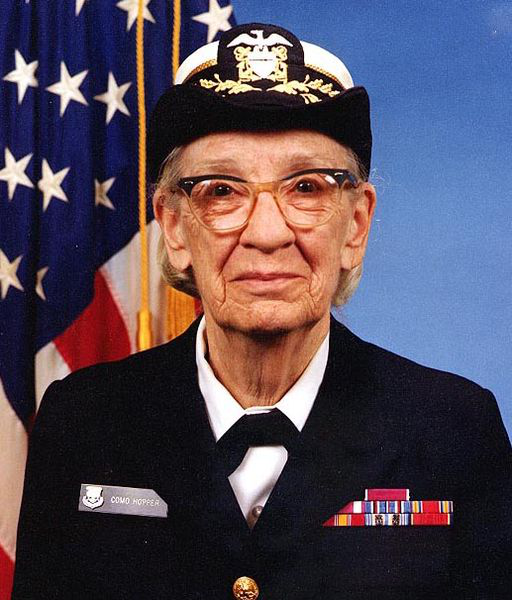

In [43]:
x = Image.open(x)
x #모델에 넣으려면 크기 맞춰줘야함

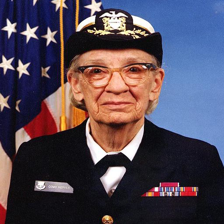

In [44]:
x.resize(( 224,224))

In [45]:
#모델 넘파이 형태로 batch size,input_shape 맞춰서 입력 받음
np.array(x.resize((224,224))).shape             #(224,224,3)
np.array(x.resize((224,224)))[np.newaxis].shape #(1, 224,224,3)

(1, 224, 224, 3)

In [46]:
model(np.array(x.resize((224,224)))[np.newaxis]) 

<tf.Tensor: shape=(1, 1001), dtype=float32, numpy=
array([[ 0.22252318,  0.08885178,  0.3948502 , ..., -0.8640514 ,
        -1.3558594 ,  3.4601574 ]], dtype=float32)>

In [47]:
np.argmax(model(np.array(x.resize((224,224)))[np.newaxis]).numpy()[0])

722

In [48]:
#이미지넷 라벨 불러오기
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
labels_path

16384/10484 [==============================================] - 0s 0us/step


'/root/.keras/datasets/ImageNetLabels.txt'

In [49]:
imagenet_labels = np.array(open(labels_path).read().splitlines())

In [50]:
with open(labels_path) as f:
  print(f.read().splitlines()[722])  # 베개로 예측하여서 틀림

pillow


normalization 한 이후 결과가 달라짐

In [ ]:
with open(labels_path) as f:
  print(f.read().splitlines()[722])  # 틀림

In [51]:
p=np.array(x.resize((224,224)))#크기
p=p/255                    #normalization
p=np.expand_dims(p,0)      #batch 맞추기

In [52]:
model(p).numpy()

array([[ 0.19971365,  1.0666462 , -0.10109372, ...,  0.15688023,
        -0.60558677, -0.04497081]], dtype=float32)

In [53]:
np.argmax(model(p).numpy())

653

In [54]:
with open(labels_path) as f:
  print(f.read().splitlines()[653])  # 답 맞춤

military uniform


## TF Hub 이용한 Transfer Learning
- tf hub 사용해서 모델의 최상위 층을 재학습

In [55]:
#꽃 데이터셋 다운로드하기 
data_root = tf.keras.utils.get_file(
  'flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
   untar=True)

228818944/228813984 [==============================] - 1s 0us/step


In [56]:
data_root #폴더 5개 

'/root/.keras/datasets/flower_photos'

데이터 구축하는 방법
1. 이미지 형태 directory 
  - Tensor
    - `image_dataset_from_directory`
        - output BatchDataset
    - HW 최적화: prefetch(AUTOTUNE)등의 제공 기능 사용 가능
    - 전처리:map (funciton), tf.keras.layers.experimental.preprocessing 레이어로 전처리
    
  - Numpy
    - `ImageDataGenerator`
        -output  DirectoryIterator
    - Python 기반 최적화 
    - 전처리, data augmentation 가능
2. pandas DataFrame으로 관리(우아함)
  - EDA도 용이
  - tf 연동
3. HDF5 
4. imagedb

### ImageDataGenerator
- Numpy
- data augmentation
- 전처리

In [57]:
#방법 1 tesor로 관리 - prefetch GPU,CPU 최적화; tf.data.DataSet
tf.keras.preprocessing.image_dataset_from_directory(data_root)

Found 3670 files belonging to 5 classes.


<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [58]:
#방법2 Numpy - 다른 파이썬 기반에서 사용 가능, 전처리도 같이 가능 ;Iterator(python generator 로 최적화)
gen=tf.keras.preprocessing.image.ImageDataGenerator(
                                    rescale=1/255) # 전처리, Data augmentation
#adapter: 데이터 디렉토리 바로 연결하고 전처리
image_gen=gen.flow_from_directory(data_root) 

Found 3670 images belonging to 5 classes.


In [59]:
gen.flow_from_dataframe #데이터 프레임에서 가져옴
gen.flow_from_directory #디렉토리에서 데이터 가져옴

<bound method ImageDataGenerator.flow_from_directory of <tensorflow.python.keras.preprocessing.image.ImageDataGenerator object at 0x7fc7423537b8>>

- 모델 가져와서 처음부터 재학습
- 끝의 레이어만 바꿔서 fine tuning
    -  유사성이 어느정도 있는 경우
    - fine tuning: 복잡한 구조와 이미 1000개의 클래스를 분류할 수 있는 데이터로 학습 되어있어서 전이 학습에도 큰 성능 문제 없을거라고 가정함

In [60]:
feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2"
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(224,224,3))

주소 특징
- classificaiton:  전체 모델
- feature-vector : FCNN제외한 모델 일부(haedless model) 
  - tf.keras.applications 모델. include_top=False 와 동일

다운로드하거나 파이썬에서 주소를 통해서 불러오기 가능

In [61]:
#headless model
#다양하게 사용가능
fx=hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1")
#input_shape, build, Input 3가지

In [62]:
#keras에서 만 사용 가능
ef=tf.keras.applications.EfficientNetB4(include_top= False) #feature_vector

71688192/71686520 [==============================] - 1s 0us/step


In [63]:
#transfer learning 
mo=tf.keras.models.Sequential([
                               tf.keras.Input((224,224,3)),
                               fx,
                               #tf.keras.layers.Flatten(), #모델 내에 이미 flatten 되어있는지 안되어있는지 아직 모름
                               tf.keras.layers.Dense(5,activation='softmax')
])
#from_logits 

In [64]:
mo.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_8 (KerasLayer)   (None, 1792)              17673816  
_________________________________________________________________
dense (Dense)                (None, 5)                 8965      
Total params: 17,682,781
Trainable params: 8,965
Non-trainable params: 17,673,816
_________________________________________________________________


In [ ]:
#해당 모델의 동작을 고정하기 때문에 trainable 바꾸면 compile 다시 재호출 필요
mo.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

tf 학습 방법 5가지
1. fit
2. fit_generator
3. train_on_batch
    - gradient update
4. Gradient Tape
    - low level
5. train ( estimator )

In [66]:
#ImageDataGenerator 학습
mo.fit_generator(image_gen, epochs=10 )  #학습이 잘 안됨 

Instructions for updating:
Please use Model.fit, which supports generators.


Instructions for updating:
Please use Model.fit, which supports generators.


Epoch 1/10
115/115 [==============================] - 32s 277ms/step - loss: 0.6065 - acc: 0.8114
Epoch 2/10
115/115 [==============================] - 31s 271ms/step - loss: 0.3060 - acc: 0.9084
Epoch 3/10
115/115 [==============================] - 31s 273ms/step - loss: 0.2398 - acc: 0.9319
Epoch 4/10
115/115 [==============================] - 31s 272ms/step - loss: 0.2025 - acc: 0.9425
Epoch 5/10
115/115 [==============================] - 31s 272ms/step - loss: 0.1766 - acc: 0.9515
Epoch 6/10
115/115 [==============================] - 31s 273ms/step - loss: 0.1562 - acc: 0.9608
Epoch 7/10
115/115 [==============================] - 31s 273ms/step - loss: 0.1418 - acc: 0.9659
Epoch 8/10
115/115 [==============================] - 31s 272ms/step - loss: 0.1286 - acc: 0.9670
Epoch 9/10
115/115 [==============================] - 31s 273ms/step - loss: 0.1180 - acc: 0.9757
Epoch 10/10
115/115 [==============================] - 31s 272ms/step - loss: 0.1094 - acc: 0.9757


## RNN
- 과거이 엘어난 **순차적(sequential)/시간에 따른 상태(state)**가 현재 상태에 영향을 미치도록 만들어서 특성 시점 결과를 예측
 > 지금까지의 신경망은 전후 관계를 고려하지 않았음
- 신경망관점에서는 새롭지만 ML에서는 비슷한 모델 Times Series모델을 NN으로 만든것

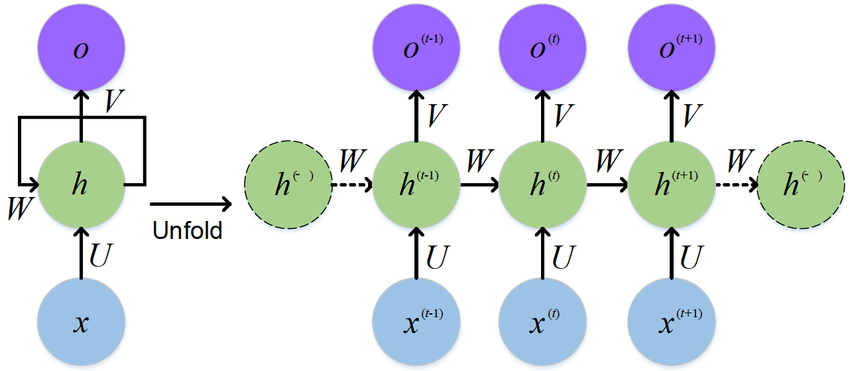
- 축약 :간략하게 표현한 simple RNN(folded), 일반 RNN(unfolded)
 - 예. 언어,음성은 순서가 매우 중요해서 최적화됨 (순서, 순차적)
  
과거상태가 현재 영향을 미쳐서 과거의 상태와 현재의 상태를 결과값을 내줌

1. **특정 상태와 상태전이를 학습을 통해서 hidden state 찾음 **
    -  **State(상태), State transition(상태 전이)**, 가중치, bias
  - **연속적**으로 일어나야함
     - 기존의 머신러닝 데이터는 독립적이어야 한다는 가정이 있는데 데이터간의 연관성이 있어도 무관 
     - hidden state: 순서대로 주어지는 관측값을 보고 숨겨진 상태를 학습(추적)
     - 매 시점에 따라 **상태가 달라서  output이 다름**
          - 예. 같은 음식이라도 현재 상태가 그동안 많이 먹어서 배가 부른 상태에서는 먹고싶지 않은데 배고픈 상태에서는 더 먹고싶어고 맛있게 느껴짐
 
> - CNN: 학습을 통해서 숨어있는 특징 파악
> - CNN + Dense: spatial features (공간적 특성)
> - RNN: 학습을 통해서 연속으로 일어난 상태, 상태 전이 찾음
> - RNN + Dense: sequential features (순차적 특성 hidden state transition)
     - 상태 변화, 숨겨진 상태 찾아서 예측
  
 > 재귀(recursive)랑 순환(recurrent) 다름
 
### Vanilla RNN 
- x_t: input
- h_t: hidden state
- W: fixed network parameters(모든시점에 동일한 파라미터 적용)
    - 상태가 변화되는 것을 가중치로 표현
- y: output(**특정 시점**에 어떤값이 나올지 예측)
- f: activation funciton: tanh,ReLu
- g: 출력 레이어 activation funciton : softmax



- 현재 상태는 과거 hidden state와 현재 입력값에 대한 어떤 함수  $ h_t = fw(h_{t-1} ,x_t) $
- 현재의 hidden state :$ h_t = f(W_{hh} h_{t-1} + W_{xh} x_t +b_n) $
    - $h_{t-1}$ 과거 상태가 $h_t$ 현재에 영향을 미침
    - Cell관점에서는 현재 입력과 과거의 상태가 셀을 넣어가면 결과값(다음 셀의 입력)
      - 입력값과 이전 상태를 각 상태변이를 곱해서 합쳐서 bias  더해서 다음 레이어에 넘김 
- 현재의 결과값 :$y_t=g( W_{hy}h_t )$ 
    - 시점의 영향이 일정하다는 가정 : shared weights : 모든 시간대에 동일한 매개변수 $W_{hh},W_{hy}, W_{xh}$ 적용 (학습이 잘안되기 때문)

### 2,활용
다양한 모델 구성

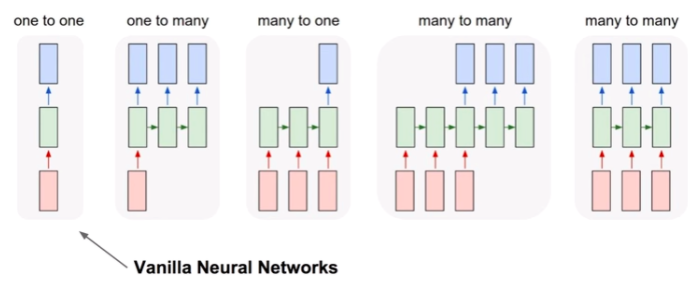

1. 1to1
   - vanilla NN: 매 입력마다 축력
2. 1 to many
   - Image Captioning : image-> sequence of words 문장 생성
3. many to 1
   - Sentiment Classifiction: seq of words -> sentiment (긍정/부정)
4. many to many( synched/unsynched)
   - Video Classification on frame level :프레임 단위로 사용
     > 이미지: stateless, 영상: 시간 순서 존재
   - Machine Translation
     - seq of words -> seq of words
 > 언어는 순서가 민감해서 특히 자연어, 음성의 핵심!!!!
- 인식: 예 손글씨를 문자열로 바꾸기
- 합성: 폰트 기반으로 손글씨
- 생성: 입력없이 생성


> CNN +RNN 조합해서 Image captioning 
    - 이미지 설명하는 모델
    - template형식으로 끼워넣음

> 정지된 하나의 이미지 
    - 초마다 이미지의 1번째 행, 2번째 행.. 하나의 이미지도 순서가 있도록 만들어서 학습 데이터 구성
    - RNN 넣기위해서 순서없이 고정된경우도 순서를 만들어서 적용함
   
학습이 안되는 문제로 활용가치가 떨어졌으나 LSTM, GRU 로 해결